101
0
155
256


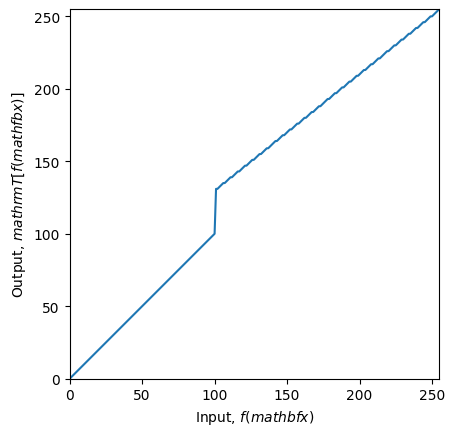

In [5]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
c = np.array([(100,100),(100,130),(220,250),(220,230)])
t1=np.linspace(0, c[0,1], c[0,0]+1-0).astype('uint8')
print(len(t1))
t2=np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype('uint8')
print(len(t2))
t3=np.linspace(c[1,1]+1,255,255-c[1,0]).astype('uint8')
print(len(t3))
transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform,t3), axis=0).astype('uint8')
print(len(transform))
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(mathbf{x})$')
ax.set_ylabel('Output, $mathrm{T}[f(mathfb{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('images/natasha.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

100
125
31
256


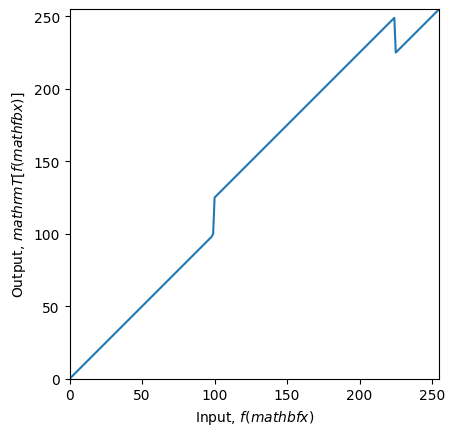

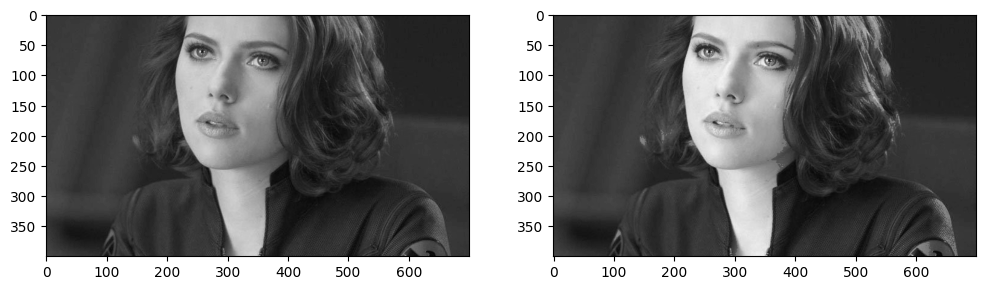

In [13]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100,100),(100,125), (225,250),(225,225)])
t1=np.linspace(0, 100, 100).astype('uint8')
print(len(t1))
t3=np.linspace(125,249, 125).astype('uint8')
print(len(t3))
t5=np.linspace(225,255, 31).astype('uint8')
print(len(t5))

transform = np.concatenate((t1,t3,t5), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
plt.plot(transform)


ax.set_xlabel('Input, $f(mathbf{x})$')
ax.set_ylabel('Output, $mathrm{T}[f(mathfb{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('images/natasha.jpg', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

image_transformed = cv.LUT(img_orig, transform)


fig, ax = plt.subplots( 1,2, figsize= (12,24))
ax[0].imshow(img_orig, cmap ='gray')
ax[1].imshow(image_transformed, cmap = 'gray')
plt.show()


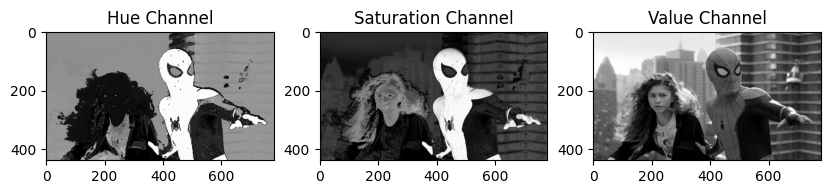

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

color = cv.imread('Images/spider.png', cv.IMREAD_COLOR)
assert color is not None

hsv_image = cv.cvtColor(color, cv.COLOR_BGR2HSV)
h_img,s_img,v_img = cv.split(hsv_image)

fig,ax = plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(h_img, cmap="gray")
ax[0].set_title('Hue Channel')
ax[1].imshow(s_img, cmap = "gray")
ax[1].set_title('Saturation Channel')
ax[2].imshow(v_img, cmap = "gray")
ax[2].set_title('Value Channel')
plt.show()



In [4]:
#Question 2

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('spider.png', cv.IMREAD_COLOR)
assert im is not None

im1 = cv.cvtColor(im, cv.COLOR_BGR2HSV)
h_img,s_img,v_img = cv.split(im1)

fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(h_img, cmap="gray")
ax[0].set_title('Hue')
ax[1].imshow(s_img, cmap="gray")
ax[1].set_title('Saturation')
ax[2].imshow(v_img, cmap="gray")
ax[2].set_title('Value')
plt.show()

x= np.arange(0, 256).astype('uint8')
a = .1
sigma = 70
x = np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))/128), 255).astype('uint8')
image_transform = cv.LUT(s_img, x)
plt.title('Intensity Transformation')
plt.plot(x)
plt.show()

newHSV = cv.merge([h_img,image_transform,v_img])
result =  cv.cvtColor(newHSV,  cv.COLOR_HSV2BGR)
added_img = cv.add(newHSV, im)

fig, ax= plt.subplots(1,3, figsize=(20,10))
ax[0].imshow(im, cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(newHSV, cmap="gray")
ax[1].set_title('Vibrance Transformation')
ax[2].imshow(added_img, cmap="gray")
ax[2].set_title('Vibrance Enhanced Image')
plt.show()

AssertionError: 